In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

### Labeling

In [2]:
import re
def my_label(image_name):
    name=re.split('[-.]+',image_name)
    name=name[-3]
    if name in classes:
        return classes.index(name)
    else:
        classes.append(name)
        return classes.index(name)

### Data

In [3]:
import os
from random import shuffle
from tqdm import tqdm

In [4]:
def my_data():
    data=[]
    for folder in tqdm(os.listdir("images")):
        t_path=os.path.join("images"+"//"+folder)
        for img in tqdm(os.listdir("images"+"//"+folder)):
            path=os.path.join(t_path,img)
            img_data=cv2.imread(path)
            img_data=cv2.resize(img_data,(50,50))
            data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data    

In [5]:
classes=[]
data=my_data()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.94it/s]


In [6]:
classes

['cat', 'dog', 'horse', 'rider']

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [8]:
x=np.array([a[0] for a in data]).reshape(-1,50,50,3)
y=np.array([a[1] for a in data])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

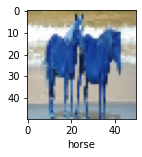

In [9]:
plot_sample(x_train,y_train,2)

In [10]:
#Normalizing the pixels of images
x_train=x_train/255.0
x_test=x_test/255.0

### Artificial Neural Networks

In [11]:
ann=models.Sequential([
    layers.Flatten(input_shape=[50,50,3]),
    layers.Dense(30,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
21/21 [==============================] - 0s 3ms/step - loss: 1.6372 - accuracy: 0.2771
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 1.4176 - accuracy: 0.2988
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 1.3666 - accuracy: 0.3529
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 1.3289 - accuracy: 0.3777
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 1.3599 - accuracy: 0.3978
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 1.2835 - accuracy: 0.4102
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 1.2819 - accuracy: 0.4118
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 1.2130 - accuracy: 0.4443
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 1.2426 - accuracy: 0.4396
Epoch 10/10
21/21 [==============================] - 0s 2ms/step - loss: 1.1782 - accuracy: 0.4954


In [13]:
ann.evaluate(x_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 1.2064 - accuracy: 0.4753


[1.206413745880127, 0.4753086566925049]

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.58      0.15      0.23        48
           1       0.34      0.56      0.43        36
           2       0.56      0.76      0.64        33
           3       0.53      0.56      0.54        45

    accuracy                           0.48       162
   macro avg       0.50      0.50      0.46       162
weighted avg       0.51      0.48      0.45       162



### SVM

In [15]:
x= x.reshape(len(x),-1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [16]:
from sklearn import svm
svm = svm.SVC(kernel='rbf', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [17]:
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.38      0.45        42
           1       0.53      0.61      0.57        49
           2       0.76      0.79      0.78        33
           3       0.64      0.71      0.67        38

    accuracy                           0.61       162
   macro avg       0.62      0.62      0.62       162
weighted avg       0.61      0.61      0.60       162



In [18]:
from sklearn import svm
svm = svm.SVC(kernel='poly', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [19]:
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.62      0.51        42
           1       0.47      0.45      0.46        49
           2       0.74      0.70      0.72        33
           3       0.72      0.47      0.57        38

    accuracy                           0.55       162
   macro avg       0.59      0.56      0.57       162
weighted avg       0.58      0.55      0.55       162

